<a href="https://colab.research.google.com/github/JAHNAVIVALLAMSETTY/OIBSIP/blob/main/EMAIL_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("spam.csv",encoding='latin1' )
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3247,ham,Also track down any lighters you can find,NaN,NaN,NaN
3372,ham,Looks like you found something to do other tha...,NaN,NaN,NaN
1839,ham,Are we doing the norm tomorrow? I finish just ...,NaN,NaN,NaN
2064,ham,Pass dis to all ur contacts n see wat u get! R...,NaN,NaN,NaN
1522,ham,I thk u dun haf 2 hint in e forum already lor....,NaN,NaN,NaN
3492,ham,"Cool, text me when you head out",NaN,NaN,NaN
5084,ham,Hey happy birthday...,NaN,NaN,NaN
630,ham,Please dont say like that. Hi hi hi,NaN,NaN,NaN
4112,ham,Thought we could go out for dinner. I'll treat...,NaN,NaN,NaN
4190,ham,"Each Moment in a day,has its own value-Morning...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
#DATA CLEANING
df.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
encoder = LabelEncoder()
df['Variety'] = encoder.fit_transform(df['Variety']) #allotting 0,1
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int64 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
df.head()

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.duplicated().sum()

0

In [15]:
#delete duplicates
df = df.drop_duplicates(keep='first')
df

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.isnull().sum()

Variety    0
Data       0
dtype: int64

In [18]:
df.sample(10)

,Variety,Data
94,0,Havent planning to buy later. I check already ...
1524,0,Hi:)cts employee how are you?
2033,0,IM GONNA MISS U SO MUCH
2905,0,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."
5362,0,I'm in inside office..still filling forms.don ...
3480,0,Wherre's my boytoy ? :-(
4481,0,What do u reckon as need 2 arrange transport i...
5561,0,Get me out of this dump heap. My mom decided t...
673,0,Ditto. And you won't have to worry about me sa...
833,0,Thank you so much. When we skyped wit kz and s...


In [19]:
df.shape

(5169, 2)

In [20]:
#EXPLORATORY DATA ANALYSIS
#NUMBER OF SPAMS AND NON-SPAMS
df['Variety'].value_counts()

Variety
0    4516
1     653
Name: count, dtype: int64

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(10)

,Variety,Data,words
735,0,Then why no one talking to me,7
756,0,Cant think of anyone with * spare room off * t...,14
3492,0,"Cool, text me when you head out",8
678,0,Cause I'm not freaky lol,6
3012,1,FREE UNLIMITED HARDCORE PORN direct 2 your mob...,33
5406,0,Dear are you angry i was busy dear,8
4942,0,Check mail.i have mailed varma and kept copy t...,15
1202,0,"Me also da, i feel yesterday night wait til 2...",14
499,0,Dear i have reache room,5
1447,0,DonÛ÷t give a flying monkeys wot they think a...,22


In [23]:
#SENTENCES IN EACH EMAIL
df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(10)

,Variety,Data,words,sentence
1393,0,Oh ok..,3,1
139,0,Got c... I lazy to type... I forgot Ì_ in lect...,24,4
4255,0,Aah! A cuddle would be lush! I'd need lots of ...,22,3
769,0,Lol I know! They're so dramatic. Schools alrea...,30,4
4887,0,You have to pls make a note of all she.s expos...,40,4
3192,0,I will lick up every drop :) are you ready to ...,18,1
5083,0,Aiya we discuss later lar... Pick Ì_ up at 4 i...,14,2
1967,0,Even i cant close my eyes you are in me our va...,16,1
4994,0,"Just looked it up and addie goes back Monday, ...",14,1
2762,0,ARR birthday today:) i wish him to get more os...,13,1


In [24]:
#CHARACTERS IN EACH TEXT
df['chars']= df['Data'].apply(len)
df.sample(10)

,Variety,Data,words,sentence,chars
4193,0,Can not use foreign stamps in this country.,9,1,43
3685,0,I get out of class in bsn in like &lt;#&gt; ...,24,1,82
1372,0,1) Go to write msg 2) Put on Dictionary mode 3...,43,2,141
1450,0,Msg me when rajini comes.,6,1,25
2598,0,Okie... Thanx...,4,1,16
1698,1,"Free msg. Sorry, a service you ordered from 81...",31,3,148
2361,0,Hi. I'm sorry i missed your call. Can you pls ...,16,3,56
1364,0,Hey i will be really pretty late... You want t...,28,3,114
830,1,U have a secret admirer. REVEAL who thinks U R...,32,6,147
194,0,How are you doing? Hope you've settled in for ...,22,3,92


In [25]:
#summary of spam mails
df[df['Variety'] == 1][['words','sentence','chars']].describe()

,words,sentence,chars
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [26]:
#Statistics summary of Non-Spam mails
df[df['Variety'] == 0][['words','sentence','chars']].describe()

,words,sentence,chars
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [ ]:
#NON SPAM MAILS HAS MORE NUMBER OF WORDS,SENTENCE AND CHARS THAN SPAM MAILS

<Figure size 800x500 with 0 Axes>

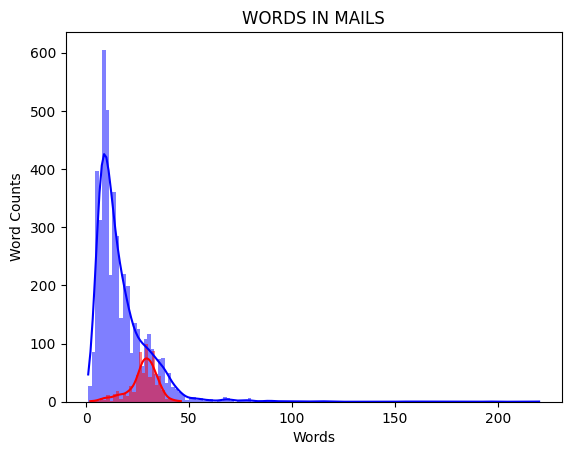

In [36]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['words'], color="blue", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS")
plt.show()

<Figure size 800x500 with 0 Axes>

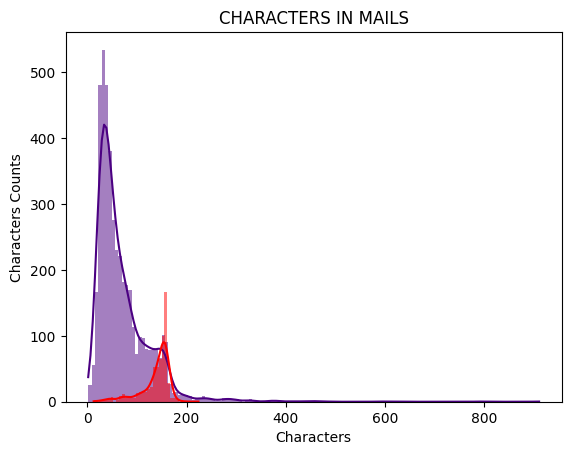

In [31]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['chars'], color="indigo", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

<Figure size 800x500 with 0 Axes>

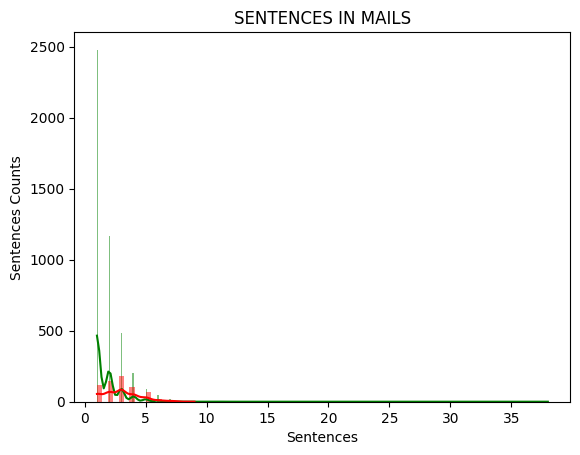

In [32]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['sentence'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()


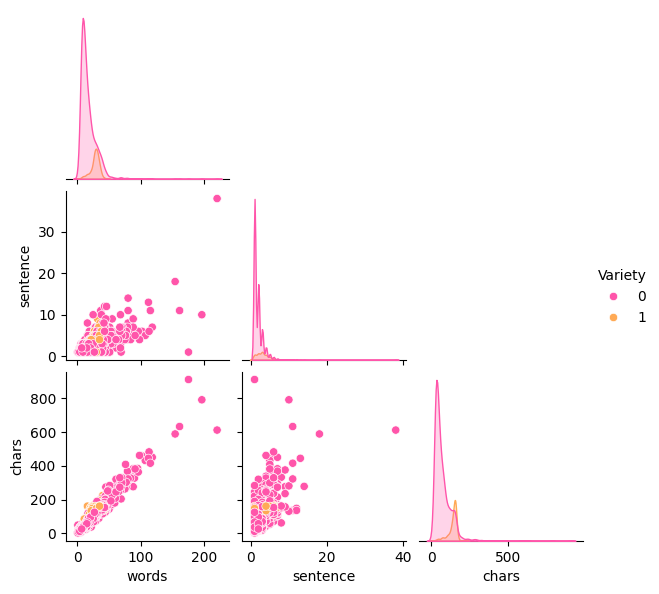

In [33]:
sea.pairplot(df,hue='Variety',corner=True,height=2,palette='spring');

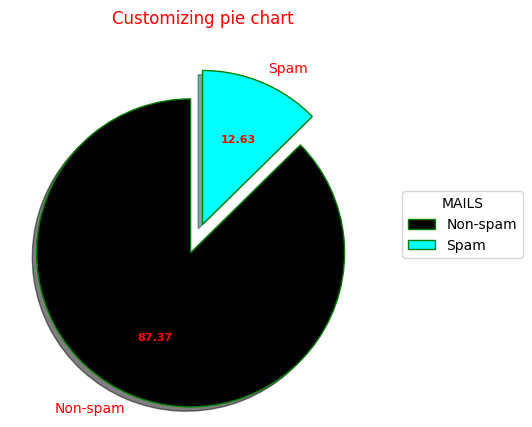

In [34]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "black", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(df['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

In [ ]:
#THE ABOVE PIE CHART DETECTS THE NUMBER OF SPAM PERCENTAGE AND NON SPAM PERCENTAGE